In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### EDA and Data Processing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [17]:
# loading the data from csv file as pandas dataframe
car_dataset = pd.read_csv('./sdata.csv')

In [18]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# check number of rows and cols
car_dataset.shape

(301, 9)

In [20]:
# get some general information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [51]:
# check how many unique values each categorical variable has
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


In [23]:
# Encoding Categorical Data

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
car_dataset['Car_Name'].unique

<bound method Series.unique of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object>

In [25]:
car_dataset.drop('Car_Name', axis=1, inplace=True)

In [26]:
car_dataset.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
5,2018,9.25,9.83,2071,1,0,0,0
6,2015,6.75,8.12,18796,0,0,0,0
7,2015,6.50,8.61,33429,1,0,0,0
8,2016,8.75,8.89,20273,1,0,0,0
9,2015,7.45,8.92,42367,1,0,0,0


<AxesSubplot:>

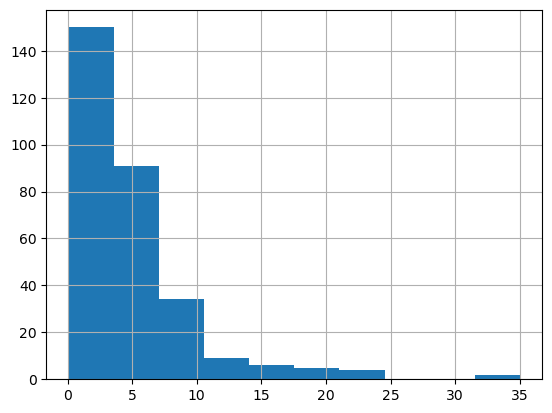

In [27]:
car_dataset['Selling_Price'].hist()

In [28]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [29]:
X = car_dataset.drop(['Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [30]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [31]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#### Splitting Dataset into training and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Build Model

In [33]:
predictor = LinearRegression()

In [34]:
predictor.fit(X_train, y_train)

LinearRegression()

### Evaluate Model

In [35]:
# prediction on Training data
Y_train_pred = predictor.predict(X_train)

In [36]:
# R squared Error
error_score = metrics.r2_score(y_train, Y_train_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8839793496750802


#### Visualize the actual prices and predicted prices

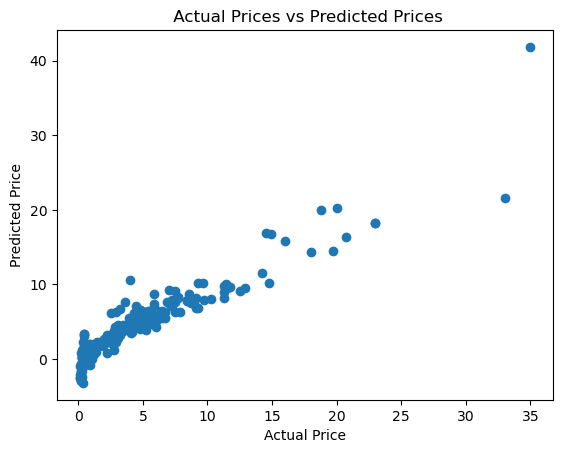

In [37]:
plt.scatter(y_train, Y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [38]:
# prediction on test data
y_pred = predictor.predict(X_test)

In [39]:
# R squared Error
test_error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8839793496750802


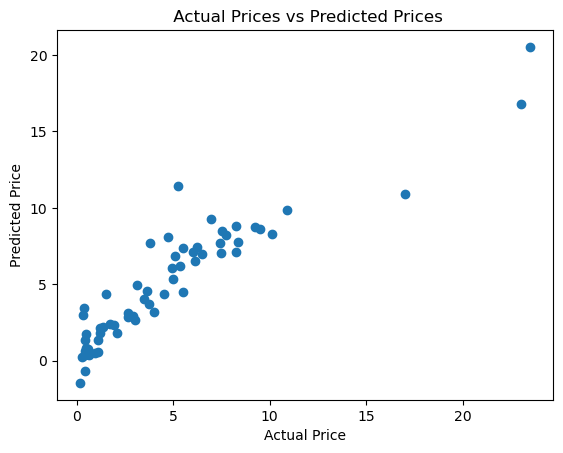

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Build Lasso Model

In [41]:
lass_reg_model = Lasso(random_state=42)

In [42]:
lass_reg_model.fit(X_train,y_train)

Lasso(random_state=42)

### Evaluate Lasso Model

In [43]:
# prediction on Training data
y_train_pred = lass_reg_model.predict(X_train)

In [44]:
# R squared Error
error_score = metrics.r2_score(y_train, y_train_pred)
print("R squared Error : ", error_score)

R squared Error :  0.848030286813716


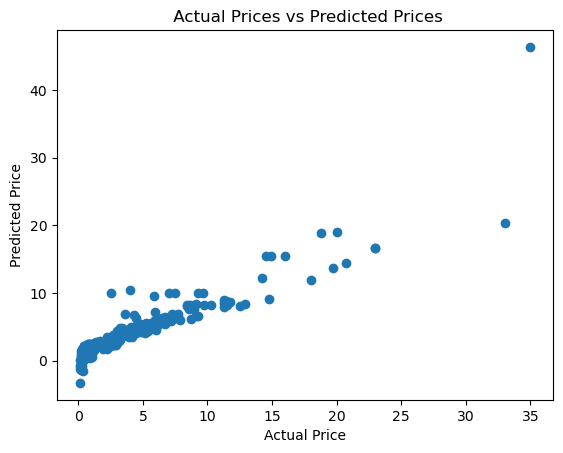

In [45]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [46]:
# prediction on test data
y_pred = lass_reg_model.predict(X_test)

In [47]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.7985512461284692


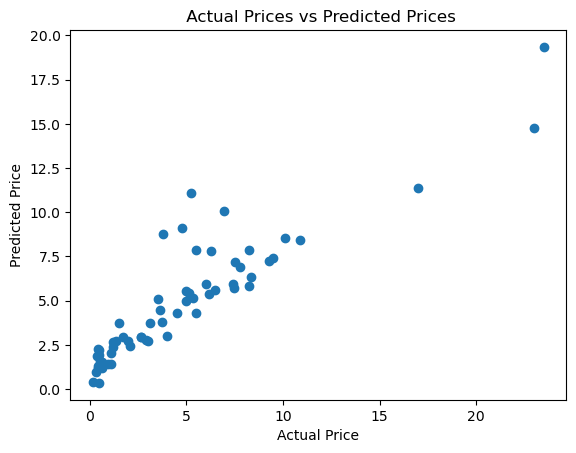

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()